In [1]:
# used to change to new drive (i.e., C: --> K:) then to spmpy directory, not always needed
#%cd K:
#%cd "K:\Labs205\Labs\THz-STM\Software\spmpy\spmpy_new_branch" 

In [2]:
import os
import importlib
import sys
sys.path.append(r'./spmpy') # directory where spmpy_terry.py is located

from spmpy import Spm   # <--- class spm defines objects of type spm with their attributes and class functions
import spmpy as spmpy   # <--- spmpy has other methods
importlib.reload(spmpy)
from spmpy import Spm   # <--- class spm defines objects of type spm with their attributes and class functions

Spm = spmpy.Spm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
%matplotlib inline

#### Example imports

In [3]:
# load images from folder
FilePath = r'K:\Labs205\Labs\THz-STM\raw data\_spmpy_test_data\simulated_files'
FilePrefix = '' #prefix of measurement name

#import scans only
ImportOnly = 'scan' #spec or scan
scans = Spm.importall(FilePath,FilePrefix,ImportOnly);
assert ['.sxm' in scan.name for scan in scans] == [True]*len(scans), 'Incorrect file extension imported'

#import spectra only
ImportOnly = 'spec' #spec or scan
specs = Spm.importall(FilePath,FilePrefix,ImportOnly);
assert ['.dat' in spec.name for spec in specs] == [True]*len(specs), 'Incorrect file extension imported'

#import grid only
ImportOnly = 'grid' #spec or scan
grids = Spm.importall(FilePath,FilePrefix,ImportOnly);
assert ['.3ds' in grid.name for grid in grids] == [True]*len(grids), 'Incorrect file extension imported'

#confirm all files imported
assert len(os.listdir(FilePath)) == len(scans) + len(specs) + len(grids), 'Failed to import all files'

1 files imported; 1 scan(s), 0 spectra, and 0 grids
69 files imported; 0 scan(s), 69 spectra, and 0 grids
2 files imported; 0 scan(s), 0 spectra, and 2 grids


In [4]:
#confirm the signals in each file have a nickname
for spm in scans + specs + grids:
    print(spm.type,spm.name)
    nicknames = [print(f'     - {channel}') for channel in spm.channels]
    signals = [print(f'     -- {signal}') for signal in spm.napImport.signals]
    assert len(nicknames) == len(signals), print('failure')

scan unnamed0001.sxm
     - z
     - V
     - I
     - dIdV
     - dIdV_Y
     -- Z
     -- Bias
     -- Current
     -- LI_Demod_1_X
     -- LI_Demod_1_Y
spec Bias-Spectroscopy00010.dat
     - V
     - I
     - V
     - dIdV
     - LI Demod 1 Y (A)
     - LI Demod 2 X (A)
     - LI Demod 2 Y (A)
     -- Bias calc (V)
     -- Current (A)
     -- Bias (V)
     -- LI Demod 1 X (A)
     -- LI Demod 1 Y (A)
     -- LI Demod 2 X (A)
     -- LI Demod 2 Y (A)
spec Bias-Spectroscopy00011.dat
     - V
     - I
     - V
     - dIdV
     - LI Demod 1 Y (A)
     - LI Demod 2 X (A)
     - LI Demod 2 Y (A)
     -- Bias calc (V)
     -- Current (A)
     -- Bias (V)
     -- LI Demod 1 X (A)
     -- LI Demod 1 Y (A)
     -- LI Demod 2 X (A)
     -- LI Demod 2 Y (A)
spec Bias-Spectroscopy00012.dat
     - V
     - I
     - V
     - dIdV
     - LI Demod 1 Y (A)
     - LI Demod 2 X (A)
     - LI Demod 2 Y (A)
     -- Bias calc (V)
     -- Current (A)
     -- Bias (V)
     -- LI Demod 1 X (A)
     -- LI Dem

#### Example image tests

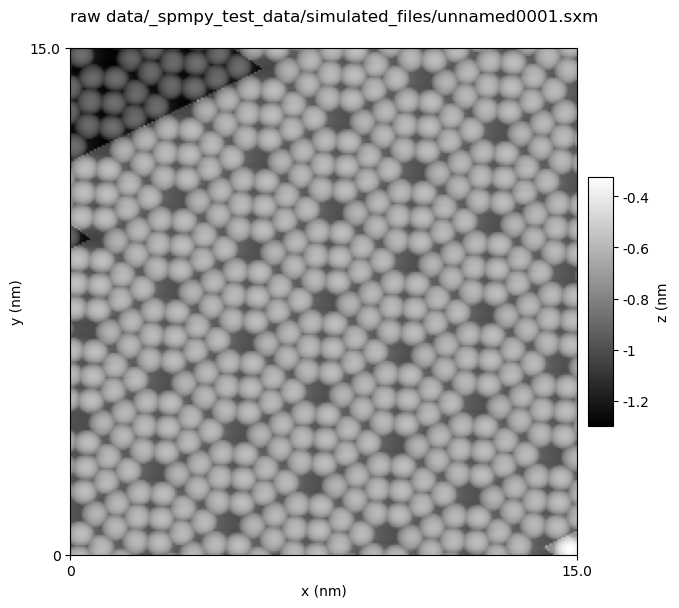

I = 50pA
bias = 2.00V
comment: None
Date: 24.04.2024 - 14:16:22
path: raw data/_spmpy_test_data/simulated_files/unnamed0001.sxm


In [5]:
# standard plot of all images and show parameters
channel = 'z'
for i in scans:
    i.plot(channel = channel, flatten = False)
    i.print_params();

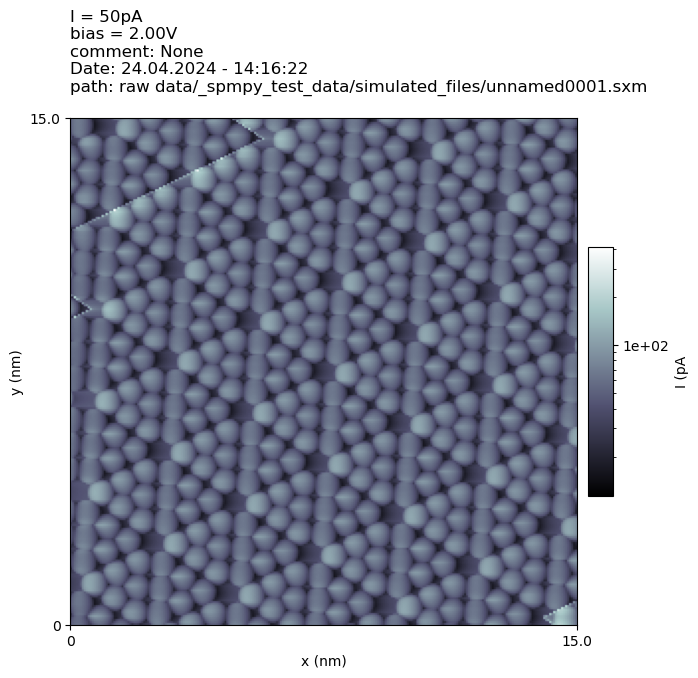

In [6]:
# log plot with additional parameters
scan = scans[0]
fig = scan.plot(channel = 'I', cmap = 'bone', log = True, show_params = True);

#confirm the plot title == print_params()
plot_title = fig.axes[0].get_title(loc='left')
params = scan.print_params(show=False)
# plot title has additional newline character
#print(plot_title.split('\n'))
#print(params.split('\n'))
assert plot_title.split('\n')[:-1] == params.split('\n'), 'Parameter and plot title mismatch'

#### optional parameters of i.plot() ####
# channel = 'z'
# direction = 'forward'
# flatten = True
# offset = True
# cmap = 'gray'
# clim = [0,1.2]
# log = False
# show_params = True
# show = True

#### Example spectra tests

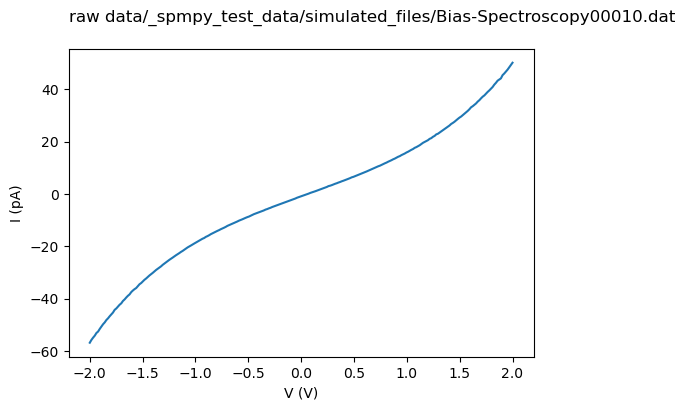

lockin: A = 100mV (θ = 0deg, f = 2000Hz)
feedback off
setpoint: I = 39pA, V = 2.0V
comment: None
Date: 24.04.2024 14:23:37
path: raw data/_spmpy_test_data/simulated_files/Bias-Spectroscopy00010.dat


In [7]:
# plot spectrum with parameters
channelx = 'V'
channely = 'I'

s = specs[0]

s.plot(channelx = channelx, channely = channely);
s.print_params();

#### optional parameters of s.plot() ####
# channelx = 'V'
# channely = 'dIdV'
# direction = 'forward'
# log = False
# loglog = False
# show = True

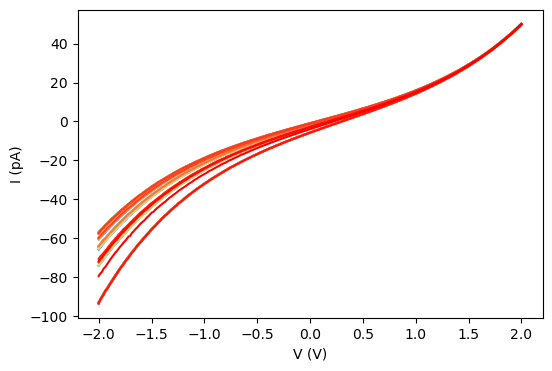

In [8]:
# plot several spectra in one plot
specs_sub = specs[1:]
fig = spmpy.specs_plot(specs_sub,channelx = 'V', channely = 'I', direction = 'forward');

assert len(fig.axes[0].lines) == len(specs_sub), 'Missing data in plot'

#### Method checks

In [9]:
# get channel function
## data, unit = spm.get_channel(channel)
scan=scans[0]
data,unit = scan.get_channel('z')
assert type(data) == np.ndarray, 'Scan data type mismatch'
assert list(data.shape) == list(scan.header['scan_pixels']), 'data shape mismatch'
assert type(unit) == str, 'Scan unit error'

spec = specs[0]
data,unit = spec.get_channel('I')
assert type(data) == np.ndarray, 'Spec data type mismatch'
assert len(data) == int(spec.header['Bias Spectroscopy>Num Pixel']), 'Missing spec data'
assert len(data.shape) == 1, 'Spec data type mismatch'
assert type(unit) == str, 'Scan unit error'

##### dIdV along a line

In [10]:
specFilePrefix = 'linespec' #prefix of measurement name
scanFilePrefix = ''

ImportOnly = 'scan' #spec or scan
scans_along_line = Spm.importall(FilePath,scanFilePrefix,ImportOnly)
ImportOnly = 'spec' #spec or scan
specs_along_line = Spm.importall(FilePath,specFilePrefix,ImportOnly)

1 files imported; 1 scan(s), 0 spectra, and 0 grids
9 files imported; 0 scan(s), 9 spectra, and 0 grids


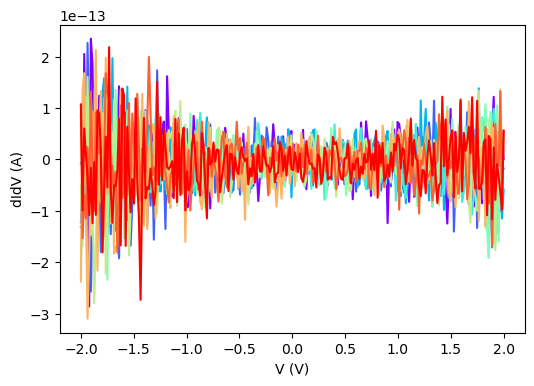

In [11]:
fig = spmpy.specs_plot(specs_along_line,channelx = 'V', channely = 'dIdV', direction = 'forward');
assert len(fig.axes[0].lines) == len(specs_along_line), 'Missing data in plot'

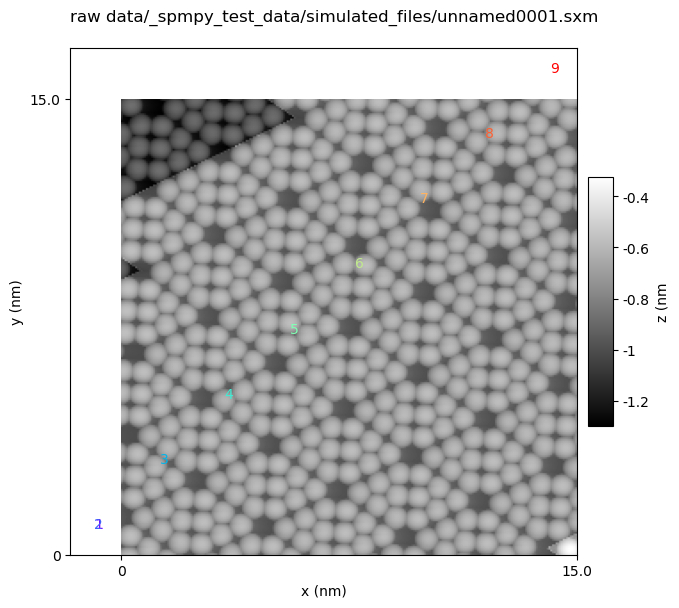

In [12]:
# plot locations on reference image
ref = scans_along_line[0]
ref_channel = 'z'
channelx = 'V'
channely = 'dIdV'

color = pl.cm.rainbow(np.linspace(0,1,len(specs_along_line)))
marker_labels = [s.name.split('.')[0][-5:].lstrip('0') for s in specs_along_line];

fig = ref.plot(channel = ref_channel, show = 0);
# plot circle for each location
# add a file number for each location
for (s,c,m) in zip(specs_along_line,color,marker_labels):
    plt.figure(fig)
    (x,y) = spmpy.relative_position(ref,s)
    plt.plot(x,y,'o',color = c,alpha=0) # plot a transparent dot
    plt.text(x,y,str(m),color = c) # put a file number on top of transparent dot
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

plt.show()

assert len(fig.axes[0].texts) == len(specs_along_line), 'Missing spec location'

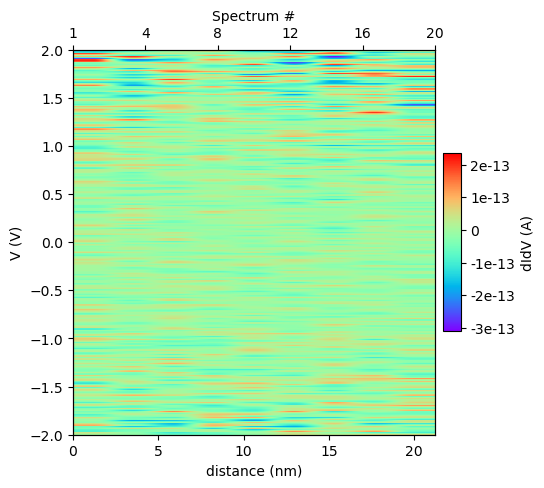

In [13]:
# Waterfall plot of specs along a line
channelx = 'V'
channely = 'dIdV'

positions = []
data = []

for s in specs_along_line:
    positions.append([s.get_param('x')[0],s.get_param('y')[0]])
    data.append(s.get_channel(channely)[0])

positions = np.array(positions)
channelx_unit = specs_along_line[0].get_channel(channelx)[1]
channely_unit = specs_along_line[0].get_channel(channely)[1]
    
data = np.transpose(data)
m,n = np.shape(data)
distance = np.linalg.norm(positions[0]-positions[-1])
x = np.linspace(0,distance,n)
y = s.get_channel(channelx)[0]

plt.figure(figsize=(5,5))

plt.imshow(data, aspect = 'auto',extent = [x[0],x[-1],y[0],y[-1]],origin='upper', cmap = 'rainbow')
cbar = plt.colorbar(fraction=0.046, pad=0.02, format='%.2g',shrink = 0.5,aspect=10)
cbar.set_label('%s (%s)' % (channely,channely_unit))
plt.ylabel('%s (%s)' % (channelx,channelx_unit))
plt.xlabel('distance (nm)')
ax2 = plt.twiny()
ax2.set_xlim(plt.xlim())
ax2_ticks = np.linspace(0,19,6)
ax2.set_xticks(ax2_ticks)
ax2.set_xticklabels([int(tick)+1 for tick in ax2_ticks])
ax2.set_xlabel('Spectrum #')
plt.show()

assert list(data.shape) == [len(s.get_channel(channelx)[0]),len(specs_along_line)], 'Incorrect data shape'

##### spec grid

In [14]:
scanFilePrefix = '' #prefix of measurement name
gridFilePrefix = 'Grid Experiment'

ImportOnly = 'scan' #spec or scan
scan_grid = Spm.importall(FilePath,scanFilePrefix,ImportOnly)
ImportOnly = 'spec' #spec or scan
specs_in_grid = Spm.importall(FilePath,gridFilePrefix,ImportOnly)

1 files imported; 1 scan(s), 0 spectra, and 0 grids
30 files imported; 0 scan(s), 30 spectra, and 0 grids


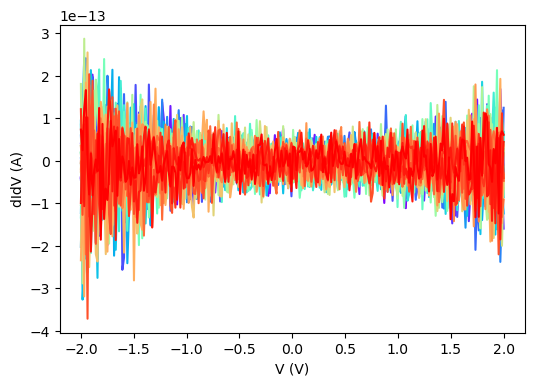

In [15]:
fig = spmpy.specs_plot(specs_in_grid,channelx = 'V', channely = 'dIdV', direction = 'forward');
assert len(fig.axes[0].lines) == len(specs_in_grid), 'Missing data in plot'

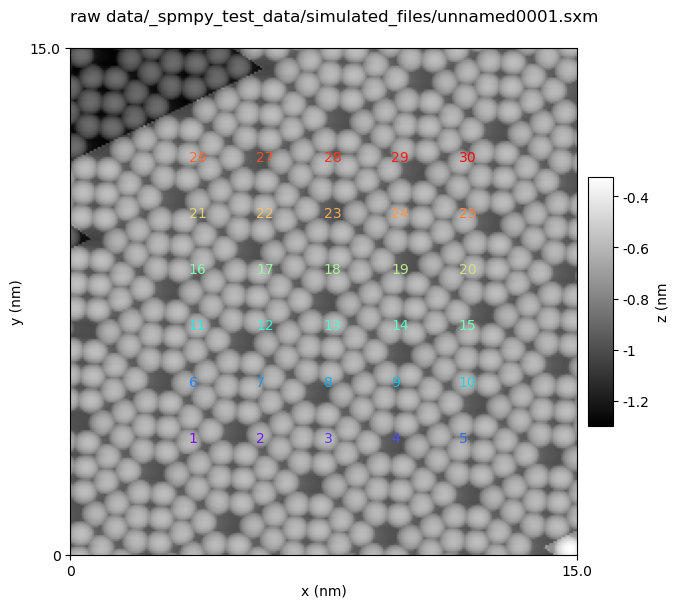

In [16]:
# plot locations on reference image
ref = scan_grid[0]
ref_channel = 'z'
channelx = 'V'
channely = 'dIdV'

col = pl.cm.rainbow(np.linspace(0,1,len(specs_in_grid)))

fig = ref.plot(channel = ref_channel, show = 0);

#marker labels
marker_labels = [s.name.split('.')[0][-5:].lstrip('0') for s in specs_in_grid];

# plot a file number for each location
for (s,c,m) in zip(specs_in_grid,col,marker_labels):
    plt.figure(fig)
    (x,y) = spmpy.relative_position(ref,s)
    plt.text(x,y,str(m),color = c)
    
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

plt.show()

assert len(fig.axes[0].texts) == len(specs_in_grid), 'Missing spec location'